__Universidade Federal do Pará  
  Disciplina: Tópicos Especiais em Inteligência Artificial  
  Docente: Claudomiro Sales  
  Discente: Hiago Cavalcante Prata  
  Matrícula: 201406840049__

---

### Atividade 02: Título

[1. Introdução](#1.-Introdução)  
[2. Baseline](#2.-Baseline)  
[3. Testes](#2.-Testes)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Teste 1](#3.1.-Teste-1)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Teste 2](#3.2.-Teste-2)    
[4. Hipóteses](#4.-Hipóteses)  
[5. Resultados](#5.-Resultados)  
[6. Considerações Finais](#6.-Considerações-Finais)  

---

## 1. Introdução

In [67]:
import random as rnd
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
#! /usr/bin/env python
# -*- coding: utf8 -*-

import numpy as np

class Chromossome:

    genes = []
    fitness = 0

    def __init__(self, size, alphabet):
       self.genes = np.random.choice(alphabet, size) 

    def __str__(self):
       return "{0}".format(self.genes)

    def _fitness(self, func):
        self.fitness = func(self.genes, target)

class Population:
    
    alphabet = []
    population = []
    pop_size = 0
    chromossome_size = 0

    def __init__(self, pop_size, chromossome_size, alphabet):
        self.alphabet = alphabet
        self.pop_size = pop_size
        self.chromossome_size = chromossome_size
        self.population = self.__gen_pop(pop_size, chromossome_size, alphabet)
    def __str__(self):
        string = ""

        for i in range(len(self.population) - 1):
            string += str(self.population[i]) + "\n"
        string += str(self.population[-1])
        return string

    def sort(self):
        self.population = sorted(self.population, key=lambda chromossome: chromossome.fitness)

    def renew(self):
        index = len(self.population)/2
        self.population = self.__gen_pop(index, self.chromossome_size, self.alphabet) + self.population[index:]

    def __gen_pop(self, pop_size, chromossome_size, alphabet):
        pop = []
        for _ in range(pop_size):
            pop.append(Chromossome(chromossome_size, self.alphabet))
        return pop

class Randomwalk(Population):
    pass

In [68]:
def create_word(word_size):
    rnd.seed()
    return [rnd.choice([0, 1]) for _ in range(word_size)]

def init_pop(pop_size, word_size):
    rnd.seed()
    p = []
    for _ in range(pop_size):
        p.append([rnd.choice([0, 1]) for _ in range(word_size)])
    return p

def calc_fitness(pop, word):
    f = []
    for i in range(len(pop)):
        f.append(cmp_words(pop[i], word))
    return f

def sort_pop(fitness, pop):
    f, p = zip(*sorted(zip(fitness, pop), key = lambda pair: pair[0]))
    return list(f), list(p)

def renew_pop(pop, word_size):
    idx = int(len(pop)/2)
    return init_pop(idx, word_size) + pop[idx:]

def print_pop(pop):
    print("pop:")
    for i in range(len(pop)):
        print("\t",pop[i])
    print()

def cmp_words(w1, w2):
    c = 0
    for i, j in zip(w1, w2):
        if i == j:
            c += 1
    return c


---

## 2. Baseline  



In [69]:
word_size_1 = 10
word_size_2 = 15
word_size_3 = 20

pop_size_1  = 20
pop_size_2  = 100
pop_size_3  = 300
pop_size_4  = 1000

gen_count = 500

# 1

In [70]:
best_scores_1 = []

w1 = create_word(word_size_1)

print("target:\n\t", w1)

target:
	 [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


In [87]:
for _ in range(10):

    best_scores = []
    
    p1 = init_pop(pop_size_4, word_size_1)
    
    for _ in range(gen_count):
                
        f1 = calc_fitness(p1, w1)
        
        f1, p1 = sort_pop(f1, p1)

        p1 = renew_pop(p1, word_size_1)

        f1 = calc_fitness(p1, w1)

        f1, p1 = sort_pop(f1, p1)
        
        best_scores.append(max(f1))
    
    best_scores_1.append(best_scores)
    
print(len(p1))


1000


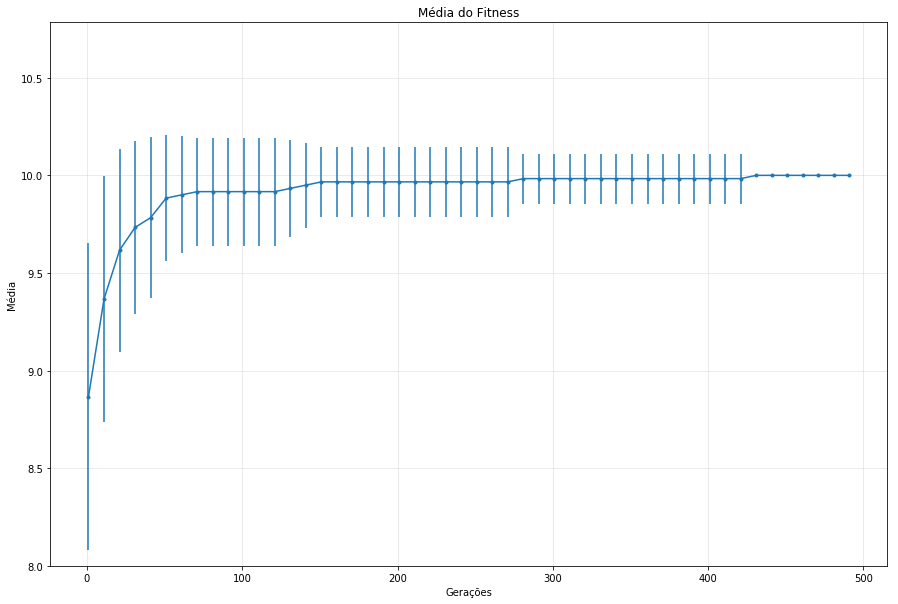

In [86]:
bs1 = np.array(best_scores_1)
m1 = np.mean(bs1, axis=0) 
std1 = np.std(bs1, axis=0)
idx = np.arange(1, gen_count, 10)


pl.figure(figsize=(15, 10))
pl.gca().set_ylim([round(min(m1))-1, word_size_1+max(std1)])
pl.title('Média do Fitness')
pl.xlabel('Gerações')
pl.ylabel('Média')
pl.grid(alpha=0.3)
pl.errorbar(idx, m1[::10], std1[::10], ls=None, marker='.')
pl.show()




# 2

In [73]:
best_scores_2 = []

w2 = create_word(word_size_2)

print("target:\n\t", w2)

target:
	 [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0]


In [74]:
for _ in range(10):
    
    best_scores = []
    
    p2 = init_pop(pop_size_1, word_size_2)
    
    for _ in range(gen_count):
                
        f2 = calc_fitness(p2, w2)
        
        f2, p2 = sort_pop(f2, p2)

        p2 = renew_pop(p2, word_size_2)

        f2 = calc_fitness(p2, w2)

        f2, p2 = sort_pop(f2, p2)
        
        best_scores.append(max(f2))
    
    best_scores_2.append(best_scores)


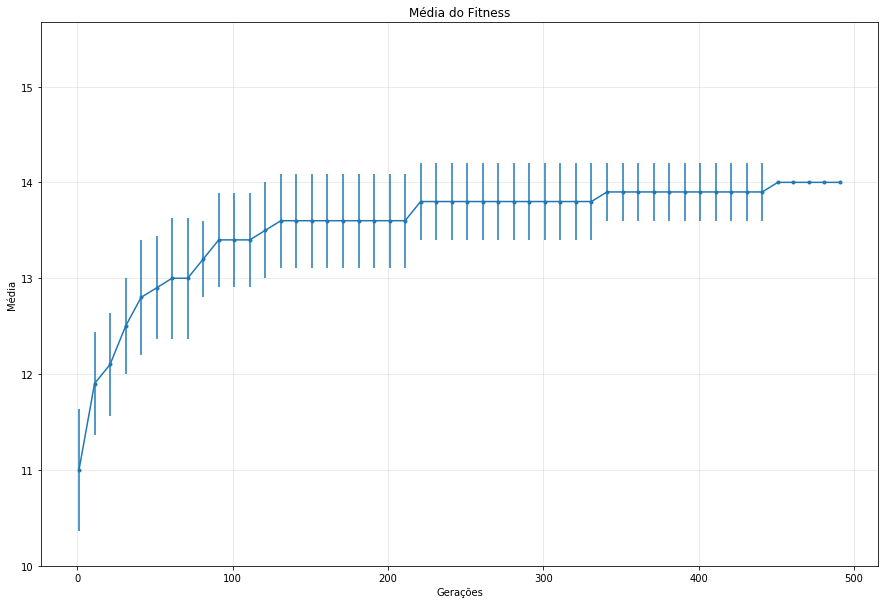

In [75]:
bs2 = np.array(best_scores_2)
m2 = np.mean(bs2, axis=0) 
std2 = np.std(bs2, axis=0)
idx = np.arange(1, gen_count, 10)


pl.figure(figsize=(15, 10))
pl.gca().set_ylim([round(min(m2))-1, word_size_2+max(std2)])
pl.title('Média do Fitness')
pl.xlabel('Gerações')
pl.ylabel('Média')
pl.grid(alpha=0.3)
pl.errorbar(idx, m2[::10], std2[::10], ls=None, marker='.')
pl.show()




# 3

In [76]:
best_scores_3 = []

w3 = create_word(word_size_3)

print("target:\n\t", w3)

target:
	 [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [77]:
for _ in range(10):
    
    best_scores = []
    
    p3 = init_pop(pop_size_1, word_size_3)
    
    for _ in range(gen_count):
                
        f3 = calc_fitness(p3, w3)
        
        f3, p3 = sort_pop(f3, p3)

        p3 = renew_pop(p3, word_size_3)

        f3 = calc_fitness(p3, w3)

        f3, p3 = sort_pop(f3, p3)
        
        best_scores.append(max(f3))
    
    best_scores_3.append(best_scores)


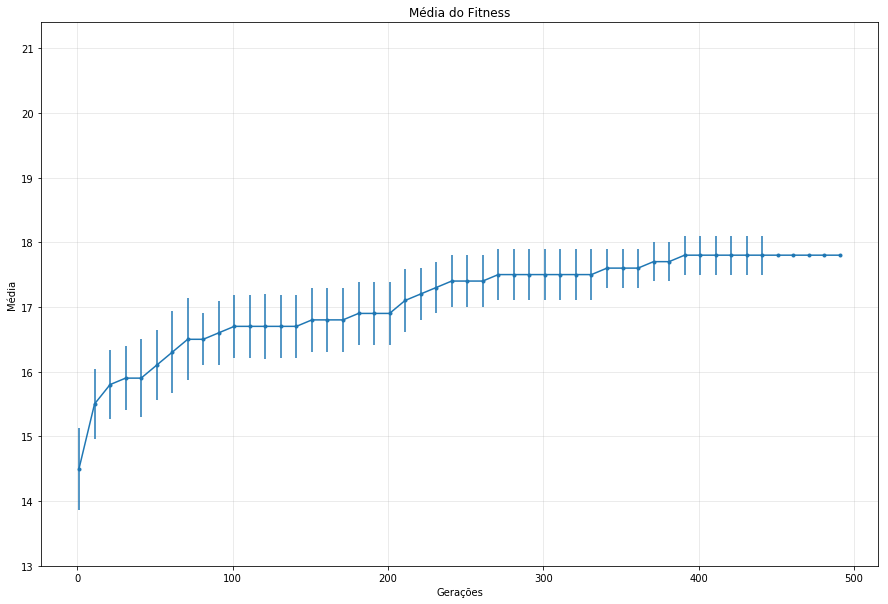

In [78]:
bs3 = np.array(best_scores_3)
m3 = np.mean(bs3, axis=0) 
std3 = np.std(bs3, axis=0)
idx = np.arange(1, gen_count, 10)


pl.figure(figsize=(15, 10))
pl.gca().set_ylim([round(min(m3))-1, word_size_3+max(std3)])
pl.title('Média do Fitness')
pl.xlabel('Gerações')
pl.ylabel('Média')
pl.grid(alpha=0.3)
pl.errorbar(idx, m3[::10], std2[::10], ls=None, marker='.')
pl.show()




---

## 3. Testes  



### 3.1. Teste 1


---

### 3.2. Teste 2

---

## 4. Hipóteses  


---

## 5. Resultados  


---

## 6. Considerações Finais

